In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Example: a pendulum
Consider a mathematical pendulum and denote by $\alpha$ the angle it forms with the vertical axis. Suppose that the length $l=1$ and the gravity acceleration $g=1$. Then the dynamics of the pendulum is described by the equation

$$\ddot{\alpha}=-\sin \alpha.$$

Denoting $v=\dot \alpha$, rewrite as a first-order system $\dot{X}=f(X)$, where $X = {\alpha\choose v}$:

$$\frac{d}{dt}{\alpha\choose v}={v\choose -\sin \alpha}.$$

## Euler method
Approximate solution for $\dot{X}=f(X)$.

Denote by $\tilde{X}_n$ the approximate solution at time $t_0+n\Delta t$, with $n$ integer. Then

$$\tilde{X}_{n+1}=\tilde{X}_n+f(\tilde X_n)\Delta t, \quad n=0,1,\ldots$$

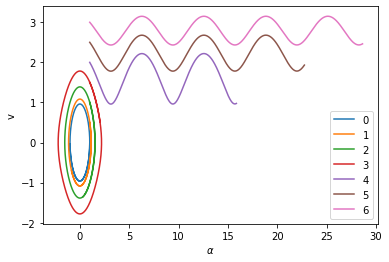

In [3]:
%matplotlib inline
# The RHS of the ODE
def f(X):               # X = np.array([alpha,v])
    return np.array([X[1], -np.sin(X[0])])


# The solver
def Euler(f, 
          X0,         # the initial condition [alpha0, v0]
          dt=1e-3, 
          N=10000     # number of steps
         ):
    X = np.array(X0)
    alphaHistory = [X[0]]
    vHistory = [X[1]]
    tHistory = [0]
    for n in range(N):
        X += dt*f(X)
        alphaHistory.append(X[0])
        vHistory.append(X[1])
        tHistory.append(dt*(n+1))
        
    return alphaHistory, vHistory, tHistory

# Solution for several different initial conditions
alpha0 = 1.
for m in range(7):
    v0 = 0.5*m        
    alphaHistory, vHistory, _ = Euler(f, [alpha0, v0])
    plt.plot(alphaHistory, vHistory, label=m)
plt.xlabel('$\\alpha$')
plt.ylabel('v')
plt.legend(loc='best')    
plt.show()

In [4]:
%matplotlib auto

#for colab
# from matplotlib import animation, rc
# rc('animation', html='jshtml')

alpha0 = 1.
v0 = 1.5

alphaHistory, vHistory, tHistory = Euler(f, [alpha0, v0], dt=1e-3, N=20000)

fig = plt.figure(figsize=(5,5))
ax = plt.axes(xlim=(-1.2, 1.2), ylim=(-1.2, 1.2), )
plt.xlabel('x')
plt.ylabel('y')

line, = plt.plot([0, np.sin(alphaHistory[0])], 
                 [0, -np.cos(alphaHistory[0])], '-ob')  
  

title = plt.title('')

skip = 50
        
def animate(i): 
    line.set_data([0, np.sin(alphaHistory[::skip][i])], [0, -np.cos(alphaHistory[::skip][i])])   
    title.set_text("t = %2.3f" %(tHistory[::skip][i]))


anim = animation.FuncAnimation(fig, animate, len(tHistory[::skip]),
    interval=1)

# for local notebook
plt.show()

# for colab
# plt.close()
anim

Using matplotlib backend: Qt5Agg


**Exercise:** Show that, assuming a smooth $f$, Euler method has global convergence of order 1 (i.e., $$\max_{n: t_n\in[t_0, T]}|\tilde{X}_n-{X}_n|=O(\Delta t)$$
for a fixed finite $T$). 

**Example:** Errors at $\Delta t = 10^{-1}, 10^{-2}, 10^{-3}$

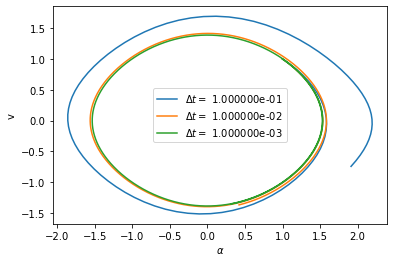

In [9]:
%matplotlib inline
for m in range(1,4):
    dt = 10**(-m)
    alphaHistory, vHistory,_ = Euler(f, [1., 1.], dt=dt, N=int(10./dt)) 
    plt.plot(alphaHistory, vHistory, label='$\Delta t=$ %e' %dt )
plt.xlabel('$\\alpha$')
plt.ylabel('v')
plt.legend(loc='best') 
plt.show()

Energy (constant of motion):

$$E=\frac{\dot \alpha^2}{2}-\cos \alpha$$ 

$$\quad \frac{dE}{dt}=0$$

In the simulation, the energy diverges with time:

Error in E at dt=1.000000e-01: 6.517522e-01
Error in E at dt=1.000000e-02: 6.410320e-02
Error in E at dt=1.000000e-03: 6.347146e-03
Error in E at dt=1.000000e-04: 6.340179e-04


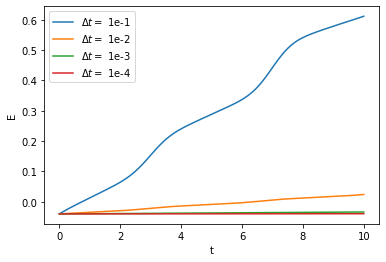

In [9]:
def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

for m in range(1,5):
    dt = 10**(-m)
    alphaHistory, vHistory, tHistory = Euler(f, [1., 1.], dt=dt, N=int(10./dt)) 
    Ehistory = [E([alphaHistory[n], vHistory[n]]) for n in range(len(alphaHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ 1e-%d' %m )
    print ('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0]))) 
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()

## Leapfrog
To solve: 
$$\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$$

Denote by index $n$ values at time $t_0+n\Delta t$, with $n$ integer or half-integer. Then 

\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1/2} &= \tilde v_{n-1/2}+f_1(\tilde x_n)\Delta t
\end{align}

**Exercise:** Show that Leapfrog's global convergence is $O((\Delta t)^2).$

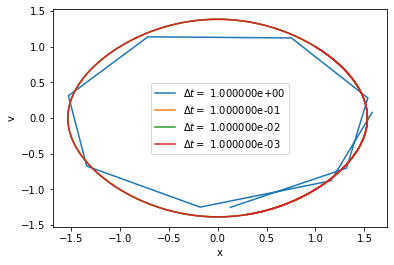

In [7]:
%matplotlib inline
def f1(x):
    return - np.sin(x)

def Leapfrog(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory_ = [v0+dt/2.*f1(x0)] # at half-integer times
    tHistory = [0]
    for n in range(N):
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory_.append(vHistory_[-1]+dt*f1(xHistory[-1]))
        tHistory.append(dt*(n+1))
    # define vHistory for integer times
    vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)+1
    return xHistory[1:], vHistory, tHistory[1:]


for m in range(0,4):
    dt = 10**(-m)
    xHistory, vHistory,_ = Leapfrog(f1, 1., 1., dt=dt, N=int(10./dt)) 
    plt.plot(xHistory, vHistory, label='$\Delta t=$ %e' %dt )
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='best')  
plt.show()

Error in E at dt=1.000000e+00: 2.200689e-01
Error in E at dt=1.000000e-01: 1.425750e-03
Error in E at dt=1.000000e-02: 1.274388e-05
Error in E at dt=1.000000e-03: 1.257985e-07
Error in E at dt=1.000000e-04: 1.256354e-09


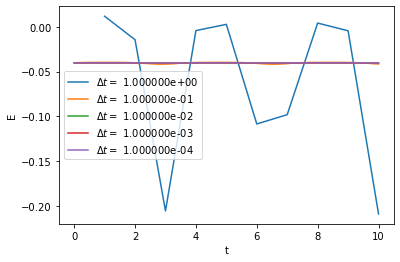

In [10]:
for m in range(0,5):
    dt = 10**(-m)
    xHistory, vHistory, tHistory = Leapfrog(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E([xHistory[n], vHistory[n]]) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt )
    print ('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0]))) 
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()

**Exercise:** Consider the **velocity Verlet** method: 

\begin{align}
\tilde v_{n+1/2} &= \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t\\
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1} &= \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t
\end{align}
Find its convergence rate theoretically and check it numerically. 

### Two gravitating bodies

$$\ddot{\mathbf{x}}_1=\frac{m_2(\mathbf{x}_2-\mathbf{x}_1)}{|\mathbf{x}_1-\mathbf{x}_2|^3}, \quad \ddot{\mathbf{x}}_2=\frac{m_1(\mathbf{x}_1-\mathbf{x}_2)}{|\mathbf{x}_1-\mathbf{x}_2|^3}$$

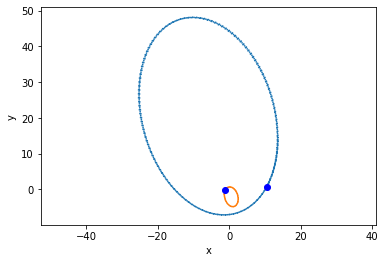

In [16]:
#%matplotlib auto
%matplotlib inline

# initial conditions
M = [1,10] # masses
x0 = 1+0*1j
x = [M[1]*x0, -M[0]*x0]
v0 = 1e-1*(0.6+1j)
v = [M[1]*v0, -M[0]*v0]


def F(a, b, M_b):   # acceleration due to Newton's gravity
    return M_b*(b-a)/np.abs(b-a)**3

def integrate(F, x, v, M, dt, N):
    
    def F_all(x):
        allF = np.zeros_like(x)
        for n in range(len(x)):
            for m in range(len(x)):
                if m != n:                    
                    allF[n] += F(x[n], x[m], M[m])
        return allF
    
    xHistory = [np.array(x)] # at integer times
    vHistory_ = [np.array(v)+dt/2.*F_all(x)] # at half-integer times    
    for n in range(N):
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory_.append(vHistory_[-1]+dt*F_all(xHistory[-1]))
    vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)+1
    return xHistory[1:], vHistory 

m = 0.1
dt = 10**(-m)
T = 1000.
xHistory, vHistory = integrate(F, x, v, M, dt=dt, N=int(T/dt)) 
tHistory = dt*np.arange(len(xHistory))

fig, ax = plt.subplots()

# trajectories
for n in range(2): 
    plt.plot([x.real[n] for x in xHistory], [x.imag[n] for x in xHistory], ':') 

# animated dots
dots, = plt.plot(xHistory[0].real, xHistory[0].imag, 'ob') 

title = plt.title('')
        
def animate(i): # update the data
    dots.set_xdata([xHistory[i].real])  
    dots.set_ydata([xHistory[i].imag])  
    title.set_text("t = %2.3f" %(tHistory[i]))

anim = animation.FuncAnimation(fig, animate, len(tHistory),
    interval=2)
    
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

# for colab
#plt.close()
anim

### Planar periodic 3-body motion under gravitational attraction ("celestial choreography")
(from the paper A. Chenciner, R. Montgomery, A remarkable periodic solution of the three-body problem in the case of equal masses, Annals of Mathematics, 152 (2000), 881-901.)

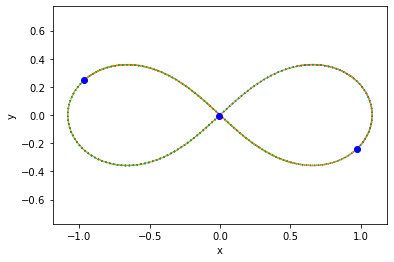

In [18]:
# special initial conditions ensuring the periodic motion
r0 = 0.97000436-0.24308753*1j 
x = [r0, -r0, 0]
v0 = -0.93240737-0.86473146*1j    # periodic
#v0 = -0.9-0.8*1j     # aperiodic
v = [-v0/2, -v0/2, v0] 


def F(a, b):   # Newton's gravity
    return (b-a)/np.abs(b-a)**3

def integrate(F, x, v, dt, N):
    
    def F_all(x):
        allF = np.zeros_like(x)
        for n in range(len(x)):
            for m in range(len(x)):
                if m != n:
                    allF[n] += F(x[n], x[m])
        return allF
    
    xHistory = [np.array(x)] # at integer times
    vHistory_ = [np.array(v)+dt/2.*F_all(x)] # at half-integer times    
    for n in range(N):
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory_.append(vHistory_[-1]+dt*F_all(xHistory[-1]))
    vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)+1
    return xHistory[1:], vHistory 

m = 2
dt = 10**(-m)
xHistory, vHistory = integrate(F, x, v, dt=dt, N=int(10./dt)) 
tHistory = dt*np.arange(len(xHistory))

#%matplotlib auto
%matplotlib inline

fig, ax = plt.subplots()

# trajectories
for n in range(3): 
    plt.plot([x.real[n] for x in xHistory], [x.imag[n] for x in xHistory], ':') 

# animated dots
dots, = plt.plot(xHistory[0].real, xHistory[0].imag, 'ob') 

title = plt.title('')
        
def animate(i): # update the data
    dots.set_xdata([xHistory[i].real])  
    dots.set_ydata([xHistory[i].imag])  
    title.set_text("t = %2.3f" %(tHistory[i]))

ani = animation.FuncAnimation(fig, animate, len(tHistory),
    interval=25)
    
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

**Idea of construction:** find a (local) minimum of the Lagrangean action under the topological constraint of a braid-like periodic motion. See Moore, C.: Braids in classical gravity. Phys. Rev. Lett. 70, 3675.

**Exercise:** Which of the following quantities must theoretically be conserved in this dynamics:
* total energy;
* total linear momentum;
* total angular momentum?

For those that must be conserved, check how well they are conserved in the simulation.

**Exercise:** Is there a periodic motion with four gravitating bodies? If yes, confirm by a simulation. 

## Large system of particles under the Lennard-Jones potential
Lennard-Jones potential (weak attraction at large $r$, strong repulsion at small $r$):
$$V(r)=4\epsilon \bigg(\Big(\frac{\sigma}{r}\Big)^{12}-\Big(\frac{\sigma}{r}\Big)^{6}\bigg)$$

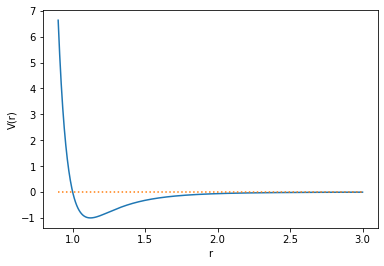

In [19]:
%matplotlib inline
def LJ(r, eps=1., sigma=1.):
    sr = sigma/r
    return 4*eps*(sr**12-sr**6)

r = np.linspace(0.9,3,1000)
y = LJ(r)
plt.plot(r, y)
plt.xlabel('r')
plt.ylabel('V(r)')
plt.plot(r, np.zeros_like(r),':')
plt.show()

### Simulation of multiple particles in a 3D box with periodic b.c. 

$$\ddot{\mathbf{x}}_n=-\sum_{k:k\ne n} V'(|\mathbf x_n-\mathbf x_k|), \quad n=1,\ldots, N$$

In [11]:
N = 100 # number of particles
L = 5. # size of the box
v0std = 1. # initial velocity std per axis per particle

init_pos = 'regular' # 'regular' or 'random'
if init_pos == 'regular': # initial positions are on a grid
    cellsPerSide = int(np.ceil(N**(1./3)))
    L1 = L/cellsPerSide
    x0 = np.zeros((N,3)) # the array of initial positions
    x0[:,0] = np.arange(N)%cellsPerSide 
    a = np.arange(N)//cellsPerSide 
    x0[:,1] = a%cellsPerSide 
    x0[:,2] = a//cellsPerSide     
    x0 = L1/2+L1*x0 
                           
elif init_pos == 'random': # initial positions are random
    x0 = L*np.random.rand(N,3)
else:
    raise NotImplementedError


v0 = v0std*np.random.normal(size=(N,3)) # initial velocities are random

def F_all(x, eps=1., sigma=1.): # construct the N x 3 array of forces (accelerations)
    x1 = np.broadcast_to(x.reshape((N,1,3)), (N,N,3))
    x2 = np.broadcast_to(x.reshape((1,N,3)), (N,N,3))
    R = x2-x1    
    R = (R+L/2.)%L-L/2. # periodic b.c.
    assert np.all(R >= -L/2.) and np.all(R <= L/2.)
    r = np.sqrt(np.sum(R*R, axis=2))+1e-10
    sr = sigma/r
    F0 = 4*eps*(12*sr**12/r-6*sr**6/r) # scalar values of forces
    F = R*np.broadcast_to((F0/r).reshape((N,N,1)), (N,N,3))
    F[range(N), range(N)] = 0 # exclude self-action
    assert np.sum(np.isnan(F)) == 0
    return -np.sum(F, axis=1) # the force is sum contributions from all particles

def integrate(F_all, x, v, dt, N): # Leapfrog
    xHistory = [x0] 
    vHistory_ = [v0+dt/2.*F_all(x)]
    for n in range(N):
        xHistory.append(np.remainder(xHistory[-1]+dt*vHistory_[-1], L))
        vHistory_.append((vHistory_[-1]+dt*F_all(xHistory[-1])))
    vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)+1
    return xHistory[1:], vHistory 

m = 2
dt = 10**(-m)
xHistory, vHistory = integrate(F_all, x0, v0, dt=dt, N=int(10./dt)) 
tHistory = dt*np.arange(len(xHistory))

### Visualization 

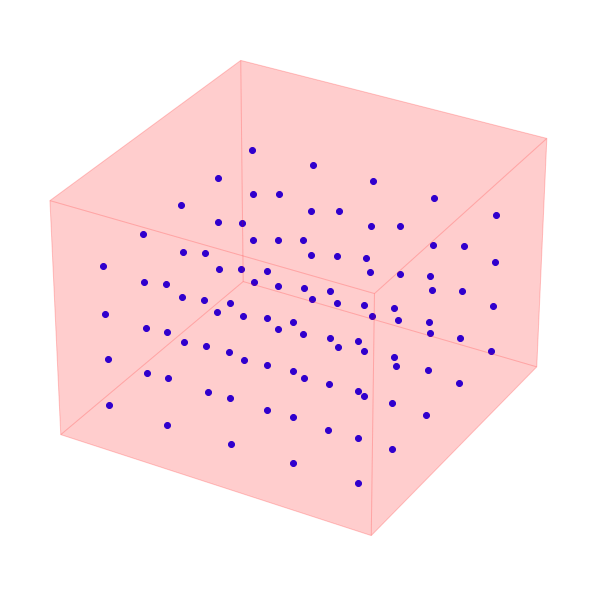

In [13]:
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.patches import Rectangle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d

#%matplotlib auto
%matplotlib inline

fig = plt.figure(figsize=(8,8))
ax = p3.Axes3D(fig)

dots, = plt.plot(xHistory[0][:,0], xHistory[0][:,1], xHistory[0][:,2], 'ob') 
  
plt.axis('off')

ax.set_xlim3d([0, L])
ax.set_ylim3d([0, L])
ax.set_zlim3d([0, L])

title = plt.title('')

for zdir in ['x','y','z']:
    for z in [0,L]:
        p = Rectangle((0,0), L, L, color='r', alpha=0.1)
        ax.add_patch(p)
        art3d.pathpatch_2d_to_3d(p, z=z, zdir=zdir)

skip = 1
        
def animate(i): 
    dots.set_data(xHistory[::skip][i][:,0], xHistory[::skip][i][:,1])  
    dots.set_3d_properties(xHistory[::skip][i][:,2])  
    title.set_text("t = %2.3f" %(tHistory[::skip][i]))


ani = animation.FuncAnimation(fig, animate, len(tHistory[::skip]),
    interval=1)

plt.show()

#### Energy plots: 

Initial energy: -191.3956502083954
Mean deviation of energy from initial value: 0.5403021039860139


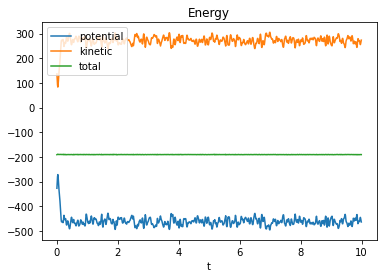

In [14]:
def getEkin(v): # kinetic
    return np.sum(v*v)/2

def getEpot(x,v,eps=1.,sigma=1.): # potential
    x1 = np.broadcast_to(x.reshape((N,1,3)), (N,N,3))
    x2 = np.broadcast_to(x.reshape((1,N,3)), (N,N,3))
    R = x2-x1    
    R = (R+L/2.)%L-L/2. # periodic b.c.
    assert np.all(R >= -L/2.) and np.all(R <= L/2.)
    r = np.sqrt(np.sum(R*R, axis=2))+1e-10
    sr = sigma/r
    Epot_ = 4*eps*(sr**12-sr**6) 
    Epot_[range(len(x)), range(len(x))] = 0
    Epot = np.sum(Epot_)/2
    return Epot

Nstart = 0
Nend = 10000

EpotHistory = [getEpot(xHistory[i], vHistory[i]) for i in range(len(xHistory[Nstart:Nend]))]
EkinHistory = [getEkin(vHistory[i]) for i in range(len(xHistory[Nstart:Nend]))]
EtotalHistory = [EpotHistory[i]+EkinHistory[i] for i in range(len(xHistory[Nstart:Nend]))]

print ('Initial energy:', EtotalHistory[0])
print ('Mean deviation of energy from initial value:', np.mean(np.abs(np.array(EtotalHistory)-EtotalHistory[0])))

plt.plot(tHistory[Nstart:Nend], EpotHistory[Nstart:Nend], label='potential')
plt.plot(tHistory[Nstart:Nend], EkinHistory[Nstart:Nend], label='kinetic')
plt.plot(tHistory[Nstart:Nend], EtotalHistory[Nstart:Nend], label='total')
plt.xlabel('t')
plt.title('Energy')
plt.legend(loc='best')
plt.show()

**Exercise:** Why is a regular initial distribution of particles better than random? Estimate theoretically the minimum size of the box for which the initial total LJ energy of $N=100$ randomly distributed particles is below $10^5$ with probability 0.9. 

**Exercise:** Implement reflective boundary conditions (particles bounce off the walls).

**Exercise:** Find a ground state of the system governed by the LJ potential. To this end, implement a "cooling" in the simulation by introducing slow particle deceleration. Is there a periodic order in the resulting configuration? Try different sizes of the box and different numbers of particles.

**Exercise:** Implement a faster ($O(N)$ instead of $O(N^2)$) computation of forces by cutting off the potential (assuming the box size is much larger than the effective interaction distance):
1. Divide the box into cubic cells so that particle interact only if they are from the same or neighboring cells. 
2. At each simulation step, create a cell-to-(all particles in this cell) dictionary.
3. Compute the forces by iterating over cells and their neighbors.

**Exercise:** Make an MPI-parallelized version of the program with a cut-off potential using domain decomposition.

**Exercise:** Implement a GPU version of the program.